In [5]:
# Run this block to install dependencies [Remember to make the statement true]
if 1 == 1:
    !pip3 install pandas
    !pip3 install tqdm
    !pip3 install scikit-learn
    !pip3 install gensim
    !pip3 install spacy
    !python3 -m spacy download en
    !pip3 install numpy

    3% |█                               | 1.1MB 187kB/s eta 0:03:142^CTraceback (most recent call last):
  File "/usr/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.5/dist-packages/spacy/__main__.py", line 31, in <module>
    plac.call(commands[command], sys.argv[1:])
  File "/usr/local/lib/python3.5/dist-packages/plac_core.py", line 328, in call
    cmd, result = parser.consume(arglist)
  File "/usr/local/lib/python3.5/dist-packages/plac_core.py", line 207, in consume
    return cmd, self.func(*(args + varargs + extraopts), **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/spacy/cli/download.py", line 33, in download
    v=version))
  File "/usr/local/lib/python3.5/dist-packages/spacy/cli/download.py", line 92, in download_model
    download_url], env=os.environ.copy())
  File "/usr/lib/python3.5/subprocess.py", line 559, in

In [6]:
import pandas as pd
import spacy
import pickle
from tqdm import tqdm
from gensim.corpora import Dictionary
from sklearn.utils import shuffle
from collections import defaultdict
import numpy as np

nlp = spacy.load('en')
DATA_LIMIT = 1000

df = pd.read_csv('./imdb_master.csv', encoding='latin1')
df_neg = df[df['label'] == 'neg']
df_pos = df[df['label'] == 'pos']
df = pd.concat((df_pos[:DATA_LIMIT], df_neg[:DATA_LIMIT]))

def process_text(input_string, return_string=False, stem=False):
    text = nlp(u'' + input_string)
    if stem == True:
        text = [tok.lemma_ for tok in text if (tok.is_alpha and not tok.is_stop)]
    else:
        text = [tok.lower_ for tok in text if (tok.is_alpha and not tok.is_stop)]
    if return_string == True:
        return " ".join(text)
    return text

In [47]:
# Make this statement true to run from scratch [It takes time to process the text]
if 1 == 0:
    wordlist = []
    for i in tqdm(range(df.shape[0])):
        wordlist.append(process_text(df['review'].iloc[i]))
        
    with open('vocabulary.txt', 'wb') as vocabulary:
        pickle.dump(wordlist, vocabulary)
    vocabulary.close()

In [7]:
# Load vocabulary
wordlist = []
with open('vocabulary.txt', 'rb') as vocabulary:
    wordlist = pickle.load(vocabulary)

In [8]:
# Keeping track of frequency of a single token
frequency = defaultdict(int)
for text in wordlist:
    for token in text:
        frequency[token] += 1
        
# Apply Threshold to limit the vocabulary size, discarding the tokens which appeard number of times below the threshold limit 
FREQ_THRESHOLD = 5

thresholded_wordlist =  [[token for token in text if frequency[token] > FREQ_THRESHOLD]
          for text in wordlist]

# Create Dictionary based on the word list
dictionary = Dictionary(thresholded_wordlist)

# Number of tokens
print("Number of Tokens - {}".format(len(dictionary)))

Number of Tokens - 5464


![image](https://i.imgur.com/f1uzTDZ.png)

# TODO

* From the screenshot you can see the implementation of word-cooccurance matrix, based on the tokens from the dictionary, build a word-cooccurance matrix yourself which is $X$. Documentation of gensim [https://radimrehurek.com/gensim/corpora/dictionary.html]
* Apply SVD on $X$
* Reduce Dimension 

![dimen_reduc](https://i.imgur.com/lezB870.png)

* Here Richard is taking only top two dimensions of the vector $U$, recommended size is *50* for now.

![dimen_reduc_u](https://i.imgur.com/TA2Bmsq.png)

* Now we can get a fixed size vector for each word. 

* Try to plot something similar based on the given dataset. In class we will try to implement a logistic regression classifier that can classify positive and negative reviews

In [22]:
token2id = dictionary.token2id

In [54]:
X = np.zeros((len(dictionary), len(dictionary)))
for text in wordlist:
    for i in range(0, len(text) - 1):
        if text[i] not in token2id.keys() or text[i+1] not in token2id.keys():
            continue
        X[token2id[text[i]]][token2id[text[i+1]]] += 1
        X[token2id[text[i+1]]][token2id[text[i]]] += 1


In [55]:
U, s, Vh = np.linalg.svd(X, full_matrices=False)

In [66]:
print(U.shape)
print(s.shape)
print(Vh.shape)
print(X[token2id['i']][token2id['am']])
print(X[token2id['am']][token2id['i']])

(5464, 5464)
(5464,)
(5464, 5464)
6.0
6.0


In [69]:
U_prime = U[:, 0:50]

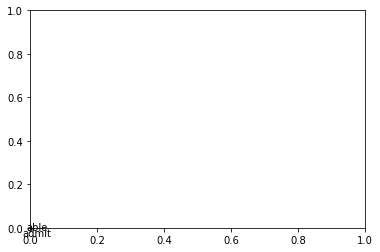

In [84]:
import matplotlib.pyplot as plt
%matplotlib inline  
words = token2id.keys()
for i in range(2):
    plt.text(U_prime[i,0], U_prime[i,1], dictionary.id2token[i])

In [83]:
[0]

'able'